In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
#!pip install kaggle
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download niteshfre/chessman-image-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip chessman-image-dataset.zip

Archive:  chessman-image-dataset.zip
replace Chessman-image-dataset/Chess/Bishop/00000000.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0],True)
    tf.config.experimental.set_memory_growth(gpus[1],True)

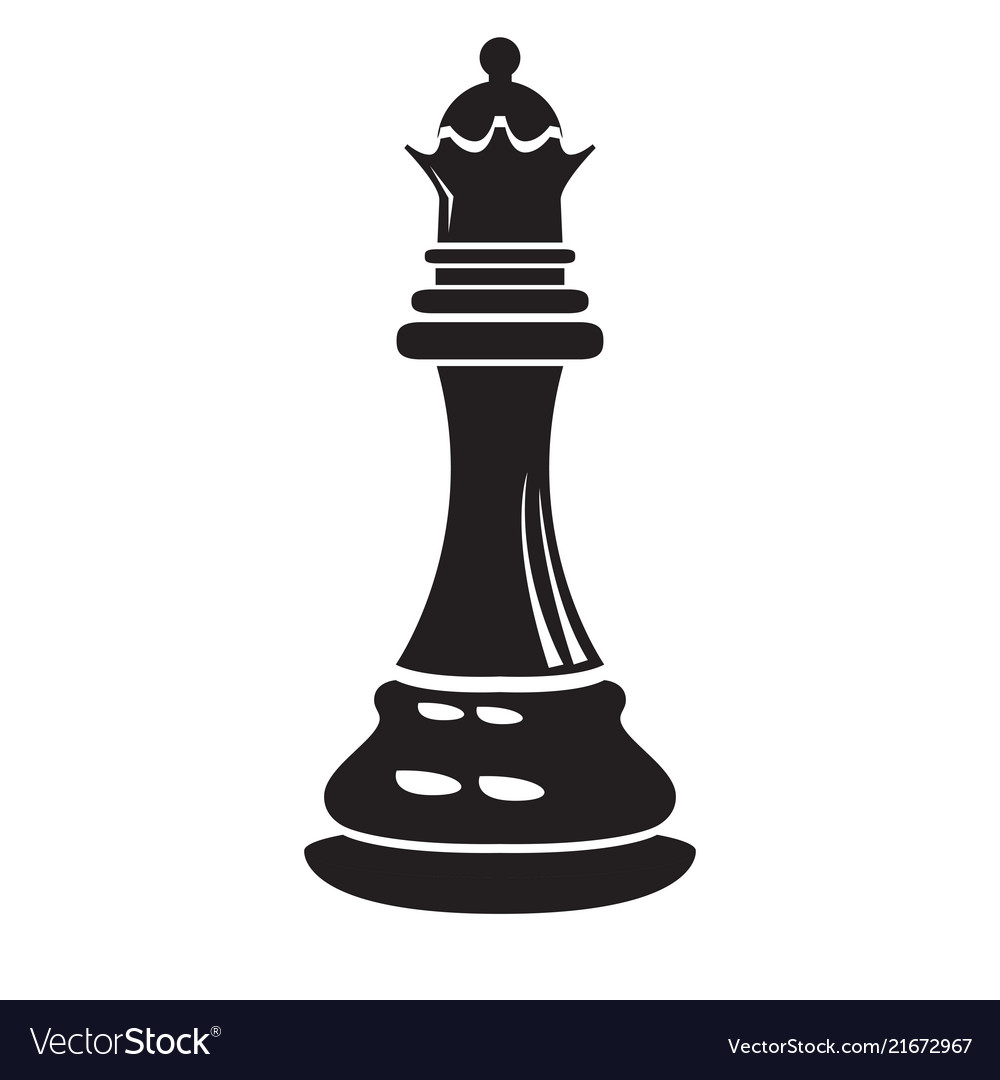

In [5]:
import glob2
import PIL
import os

data_dir = '/content/Chessman-image-dataset'
queen = glob2.glob(str(os.path.join(data_dir, 'Chess/Queen/*.jpg')))
PIL.Image.open(str(queen[0]))

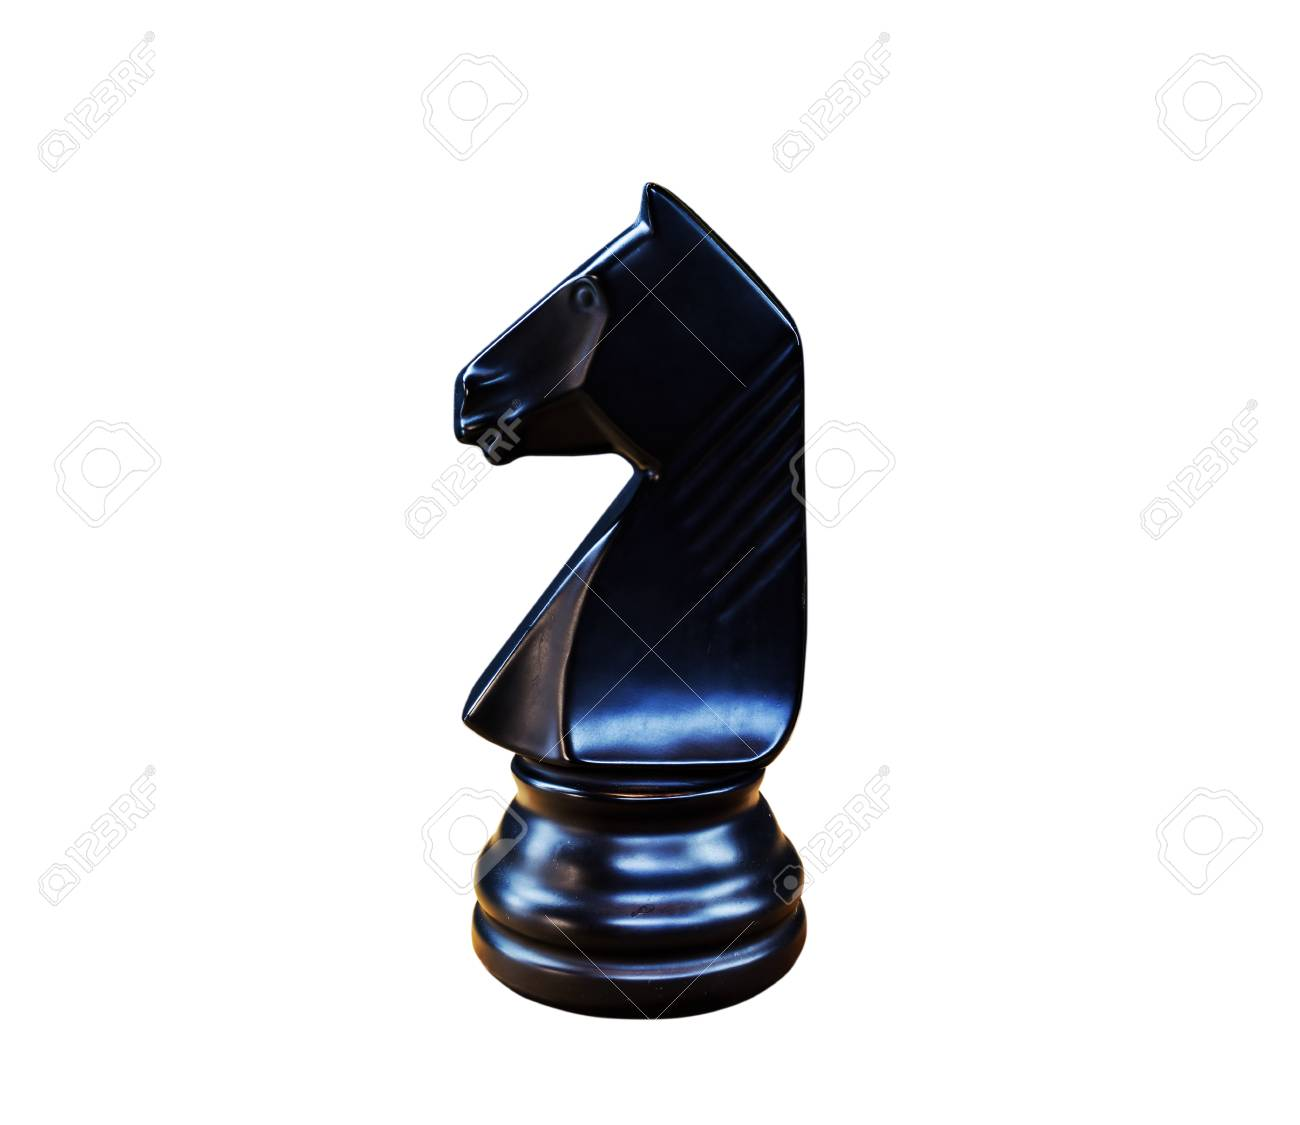

In [6]:
data_dir = '/content/Chessman-image-dataset'
knight = glob2.glob(str(os.path.join(data_dir, 'Chess/Knight/*.jpg')))
PIL.Image.open(str(knight[0]))

In [7]:
img_height,img_width,batch_size,epochs = 537,618,64,10

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 552 files belonging to 1 classes.
Using 442 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 552 files belonging to 1 classes.
Using 165 files for validation.


# Normalising Data

In [10]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds  = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

#  Encoder

In [11]:
from keras.models import Sequential
import keras.layers as layers

autoencoder = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

In [12]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
history = autoencoder.fit(train_ds, validation_data=val_ds, epochs=epochs)


In [ ]:
decoded_imgs = autoencoder.predict(train_ds)
